In [1]:
import networkx as nx
import xmltodict
import matplotlib.pyplot as plt


In [2]:
with open('./sumo_rl_nets/custom-2way-single-intersection/single-intersection.net.xml') as xml_file:
    net_data_dict = xmltodict.parse(xml_file.read())

In [3]:
G = nx.Graph()
positions = {}
edge_labels = {}
for item in net_data_dict['net']['edge']:
    if isinstance(item['lane'], list):
        for lane in item['lane']:
            lane_id = lane['@id']
            for i, co in enumerate(lane['@shape'].split(' ')):
                co = (tuple([float(x) for x in co.split(',')]))
                key = f'{lane_id}_{i}'
                positions[key] = co
                G.add_node(key, pos=co, label=lane_id)
            G.add_edge(f'{lane_id}_0', f'{lane_id}_1', label=lane_id) 
            edge_labels[(f'{lane_id}_0', f'{lane_id}_1')] = lane_id

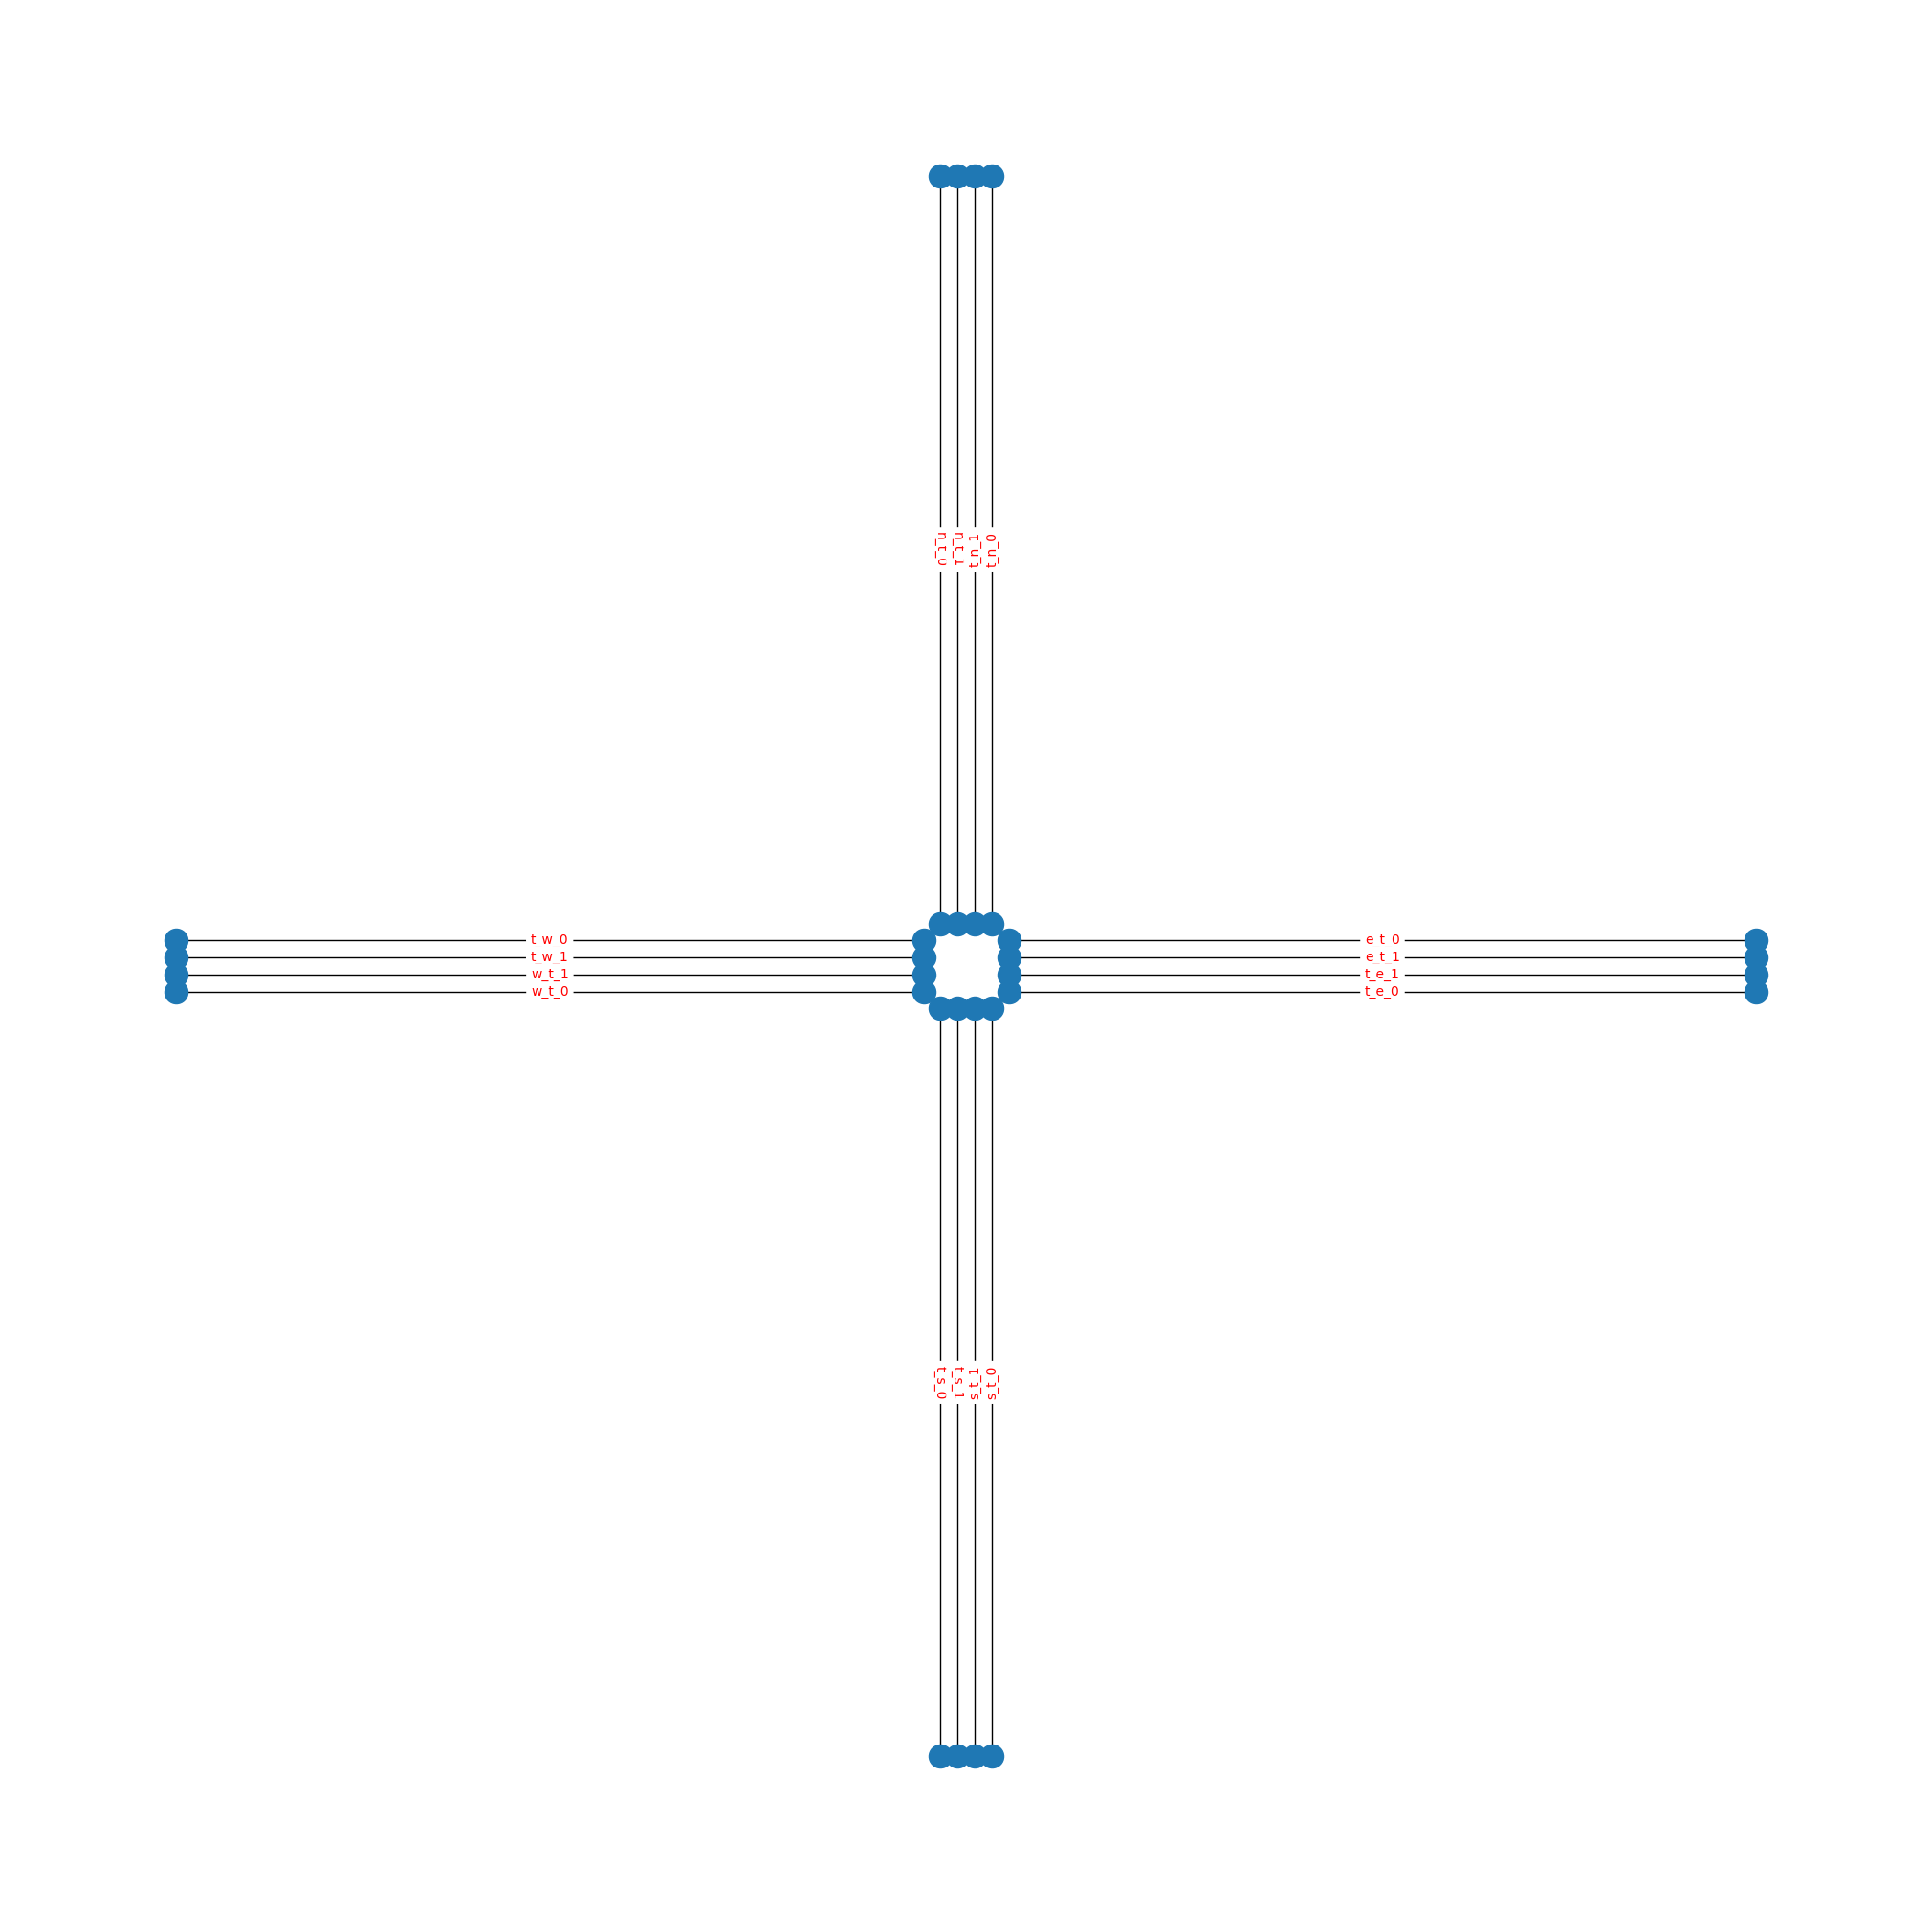

In [24]:
plt.figure(figsize=(20,20))
#rescaled_pos = nx.rescale_layout_dict(positions, scale=2)
nx.draw(G, pos=positions)
nx.draw_networkx_edge_labels(
    G, pos=positions,
    edge_labels=edge_labels,
    font_color='red',
    font_size=10,
)
plt.axis('off')
plt.show()

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace,eweights_trace ],
                    layout=go.Layout(
                        title='<br>Network graph made with Python',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20, l=5, r=5, t=40),
                        xaxis_visible=False,
                        yaxis_visible=False)
                    )

{('e_t_0_0', 'e_t_0_1'): Text(229.025, 154.95, 'e_t_0'),
 ('e_t_1_0', 'e_t_1_1'): Text(229.025, 151.65, 'e_t_1'),
 ('n_t_0_0', 'n_t_0_1'): Text(145.05, 229.025, 'n_t_0'),
 ('n_t_1_0', 'n_t_1_1'): Text(148.35, 229.025, 'n_t_1'),
 ('s_t_0_0', 's_t_0_1'): Text(154.95, 70.975, 's_t_0'),
 ('s_t_1_0', 's_t_1_1'): Text(151.65, 70.975, 's_t_1'),
 ('t_e_0_0', 't_e_0_1'): Text(229.025, 145.05, 't_e_0'),
 ('t_e_1_0', 't_e_1_1'): Text(229.025, 148.35, 't_e_1'),
 ('t_n_0_0', 't_n_0_1'): Text(154.95, 229.025, 't_n_0'),
 ('t_n_1_0', 't_n_1_1'): Text(151.65, 229.025, 't_n_1'),
 ('t_s_0_0', 't_s_0_1'): Text(145.05, 70.975, 't_s_0'),
 ('t_s_1_0', 't_s_1_1'): Text(148.35, 70.975, 't_s_1'),
 ('t_w_0_0', 't_w_0_1'): Text(70.94, 154.95, 't_w_0'),
 ('t_w_1_0', 't_w_1_1'): Text(70.94, 151.65, 't_w_1'),
 ('w_t_0_0', 'w_t_0_1'): Text(70.975, 145.05, 'w_t_0'),
 ('w_t_1_0', 'w_t_1_1'): Text(70.975, 148.35, 'w_t_1')}

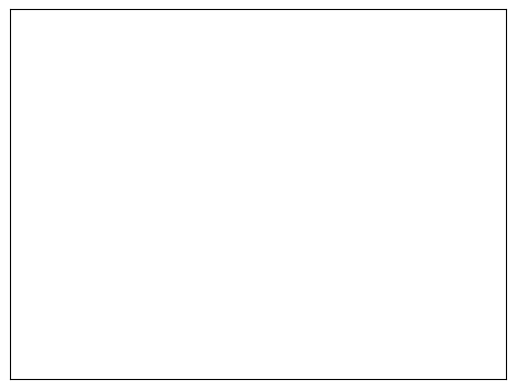

In [39]:
nx.draw_networkx_edge_labels(
    G, pos=positions,
    edge_labels=edge_labels,
    font_color='red',
    font_size=4,
)